In [4]:
from qiskit import Aer, IBMQ, BasicAer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.aer.noise.errors import thermal_relaxation_error, pauli_error
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer import noise
from qiskit.tools.monitor import backend_monitor

In [5]:
thetas = [1.1, 1.2, 1.3, 1.4]
plaintext = "1011"
ansatz_type = 'x'
if_back = True

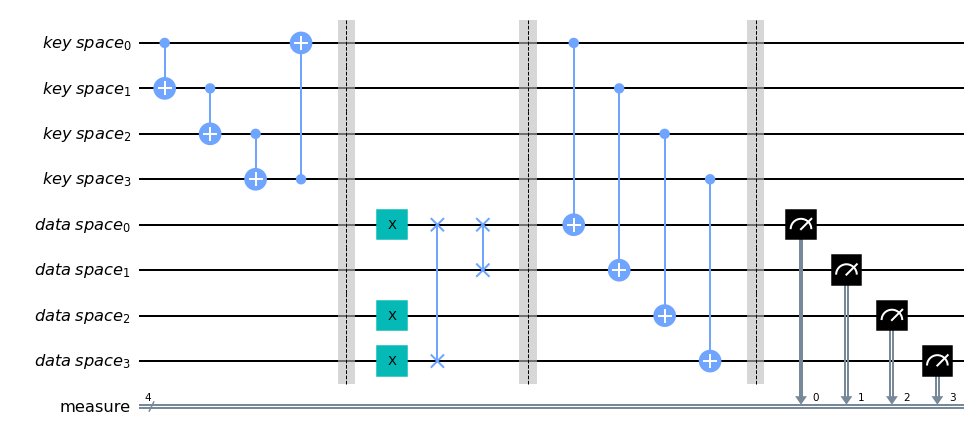

In [6]:
plaintext_length = len(plaintext)

key_space = QuantumRegister(plaintext_length, name="key space")
data_space = QuantumRegister(plaintext_length, name="data space")
measure_bits = ClassicalRegister(plaintext_length, name="measure")
circuit = QuantumCircuit(key_space, data_space, measure_bits)

# circuit.h(key_space)
# for i in range(plaintext_length):
#     circuit.ry(thetas[i], key_space[i])

if ansatz_type == 'x':
    for i in range(key_space.size-1):
        circuit.cx(key_space[i], key_space[i+1])
    if if_back:
        circuit.cx(key_space[key_space.size-1], key_space[0])
elif ansatz_type == 'y':
    for i in range(key_space.size-1):
        circuit.cy(key_space[i], key_space[i+1])
    if if_back:
        circuit.cy(key_space[key_space.size-1], key_space[0])
else:
    for i in range(key_space.size-1):
        circuit.cz(key_space[i], key_space[i+1])
    if if_back:
        circuit.cz(key_space[key_space.size-1], key_space[0])
circuit.barrier()

for bit_index in range(plaintext_length):
    if plaintext[bit_index] == '1':
        circuit.x(data_space[bit_index])

# IP sub : 2 4 3 1
circuit.swap(data_space[0], data_space[3])
circuit.swap(data_space[0], data_space[1])

circuit.barrier()

for i in range(plaintext_length):
    circuit.cx(key_space[i], data_space[i])
circuit.barrier()

for i in range(plaintext_length):
    circuit.measure(data_space[i], measure_bits[i])
circuit.draw(output="mpl")

circuit.rzz()